<a href="https://colab.research.google.com/github/mohdammar128/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='drive/My Drive/Skillslash/Arvind/Case Studies/Linear_Regression/Emp_reimb.csv'

In [ ]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import libraries for ploting
import seaborn as sns
import matplotlib.pyplot as plt




#display all rows
pd.options.display.max_rows=None

#display all coloumns
pd.options.display.max_columns=None

#to display float value upto 6 decimal places
pd.options.display.float_format='{:.6f}'.format

#import train and test split
from sklearn.model_selection import train_test_split

#import warning
import warnings
warnings.filterwarnings('ignore')

# import statsmodel (it provide us classes and funtions for estimating and
# interpretating various statistical models, including linear regression,
# logistic regression, time series analysis, and more)
import statsmodels
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

#module to calculate VIF(variance inflation facote) to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy
from scipy.stats import shapiro
#metric from sklearn is used to evaluate errors
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


The statsmodels library in Python is primarily used for:

**Statistical Modeling:** It provides classes and functions for

estimating and interpreting various statistical models, including linear regression, logistic regression, time series analysis, and more.

**Statistical Tests**: It offers a wide range of statistical tests, such as t-tests, F-tests, and chi-square tests, to analyze data and draw inferences.
**Data Exploration:** It includes tools for data visualization and summary statistics, helping users understand their data before modeling.

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df.head()

,Year,Type_of_yr,Emp_ID,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,42865,92288.220000,267.450000,270.450000,92826.120000,12500.560000,20703.200000,7605.750000,40809.510000,133635.630000
1,2015,Calendar,28253,1466.380000,0.000000,350.230000,1816.610000,442.030000,3.000000,141.590000,586.620000,2403.230000
2,2018,Financial,30664,76536.950000,10855.940000,13586.720000,100979.610000,12464.610000,18636.190000,8011.410000,39112.210000,140091.820000
3,2018,Financial,19482,45659.880000,1625.370000,3.000000,47288.250000,0.000000,10084.200000,3936.630000,14020.830000,61309.080000
4,2017,Financial,7183,41832.000000,0.000000,6.000000,41838.000000,5908.520000,7621.600000,3254.500000,16784.620000,58622.620000


here dependent variable (target)/y is = Total_Reimbursement


In [ ]:
df.index

RangeIndex(start=0, stop=49794, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 49794 non-null  int64  
 1   Type_of_yr           49794 non-null  object 
 2   Emp_ID               49794 non-null  int64  
 3   Income               49794 non-null  float64
 4   Other_Income         49794 non-null  float64
 5   Overtime             49794 non-null  float64
 6   Total_Income         49794 non-null  float64
 7   Health_Insurance     49794 non-null  float64
 8   Retirement           49794 non-null  float64
 9   Other_Benefits       49794 non-null  float64
 10  Total_Benefits       49794 non-null  float64
 11  Total_Reimbursement  49794 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
df.shape

(49794, 12)

In [ ]:
df["Year"]=df["Year"].astype("object")

In [ ]:
df=df.drop("Emp_ID", axis=1)

In [ ]:
df.describe()

,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
count,49794.000000,49794.000000,49794.000000,49794.000000,49794.000000,49794.000000,49794.000000,49794.000000,49794.000000
mean,63412.242050,3725.119205,4382.829359,71520.190613,8932.934546,12972.699476,4669.307188,26574.941210,98095.131823
std,44753.458883,7486.642061,11100.032711,52228.329948,4890.384130,9803.285867,3785.813122,16804.219299,67791.568974
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.270000,0.000000,2.990000,5.310000
25%,23752.425000,0.000000,5.000000,25635.925000,4339.617500,3680.890000,1617.325000,9832.992500,36388.335000
50%,62628.605000,649.385000,8.000000,68007.105000,12000.500000,13181.170000,4377.750000,30320.645000,98133.970000
75%,93124.830000,4494.062500,2692.230000,103031.792500,12801.790000,19610.367500,6864.430000,38741.512500,141968.395000
max,507831.600000,199112.350000,208671.820000,507838.600000,21291.180000,105055.980000,34108.750000,141046.640000,648885.240000


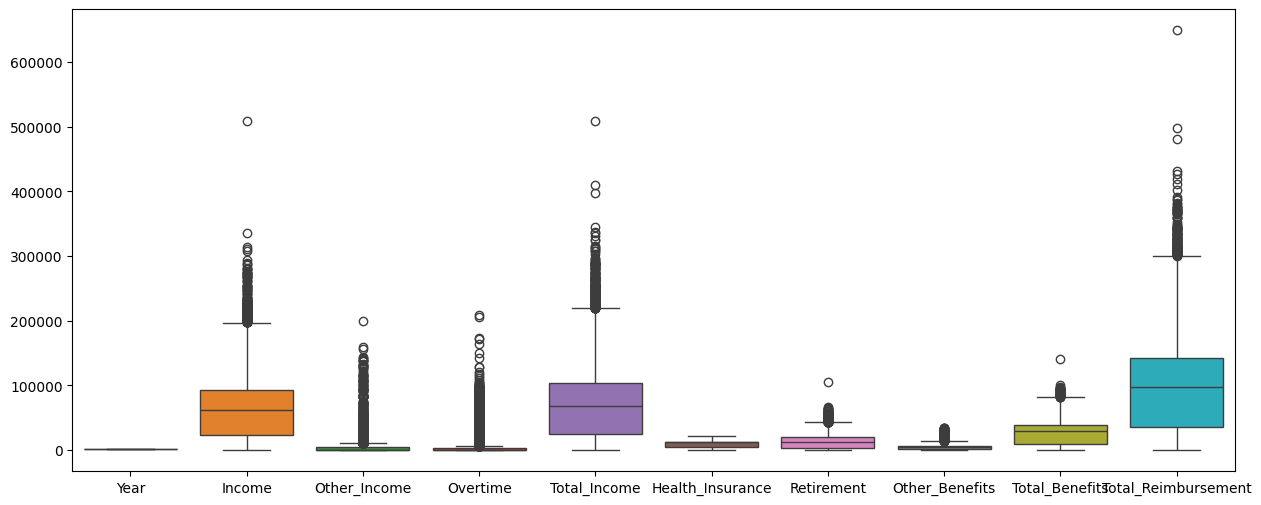

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
# plt.tight_layout()
plt.show()

In [ ]:
def scatter_plot(label1,label2,df):
  plt.figure(figsize=(15,6))
  sns.scatterplot(x=label1,y=label2,data=df)
  plt.xlabel(label1)
  plt.ylabel(label2)
  plt.show()
  return


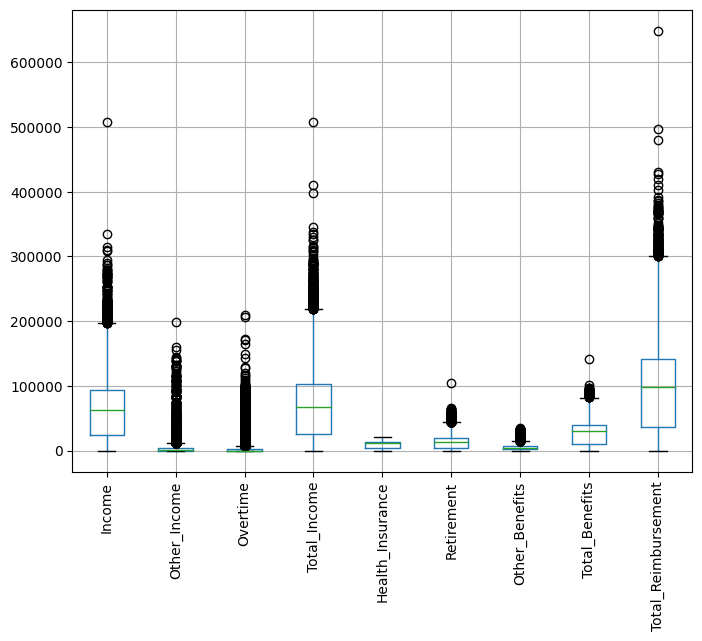

In [ ]:
list_numer=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8, 6))
df.loc[:,list_numer].boxplot()
plt.xticks(rotation=90)
plt.show()



In [ ]:
df.index

RangeIndex(start=0, stop=49794, step=1)

In [ ]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_df=df.select_dtypes(include=np.number)
# print(data_df.shape)
data_df=data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df=df.merge(data_df,left_index=True,right_index=True,suffixes=('', ''))

df = df.loc[data_df.index]
print(df.shape)


Income                 69372.405000
Other_Income            4494.062500
Overtime                2687.230000
Total_Income           77395.867500
Health_Insurance        8462.172500
Retirement             15929.477500
Other_Benefits          5247.105000
Total_Benefits         28908.520000
Total_Reimbursement   105580.060000
dtype: float64
(37601, 11)


In [ ]:
df.iloc[:, 2:] = df.iloc[:, 2:].apply(lambda x: (x - x.mean()) / x.std(), axis=0)


In [ ]:
df.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,0.979272,-0.476483,-0.234449,0.921924,0.911621,1.173963,1.141794,1.156388,0.996728
1,2015,Calendar,-1.259481,-0.588280,-0.175594,-1.270526,-1.504303,-1.186975,-1.269380,-1.374560,-1.312351
3,2018,Financial,-0.170114,0.091140,-0.431752,-0.175099,-1.592864,-0.037175,-0.043455,-0.529238,-0.275882
4,2017,Financial,-0.264471,-0.588280,-0.429539,-0.306397,-0.409093,-0.318044,-0.263806,-0.355332,-0.323152
5,2017,Calendar,0.531722,0.015083,-0.431014,0.506445,0.989313,0.506980,0.698624,0.726492,0.573053


In [ ]:
X_train_slr,X_test_slr,Y_train_slr,Y_test_slr=train_test_split(df["Total_Benefits"],df["Total_Reimbursement"],random_state=1,test_size=0.3)

In [ ]:
print(X_train_slr.shape)
print(X_test_slr.shape)
print(Y_train_slr.shape)
print(Y_test_slr.shape)

(26320,)
(11281,)
(26320,)
(11281,)


In [ ]:
print(type(X_train_slr))

<class 'pandas.core.series.Series'>


In [ ]:
X_train_slr=pd.DataFrame(X_train_slr)
X_test_slr=pd.DataFrame(X_test_slr)
Y_train_slr=pd.DataFrame(Y_train_slr)
Y_test_slr=pd.DataFrame(Y_test_slr)

In [ ]:
X_train_slr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26320 entries, 32437 to 43661
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total_Benefits  26320 non-null  float64
dtypes: float64(1)
memory usage: 411.2 KB


In [ ]:
intercept=np.ones(X_train_slr.shape[0])

In [ ]:
intercept

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
X_train_slr.insert(0,column='intercept',value=intercept)

In [ ]:
X_train_slr.head()

,intercept,Total_Benefits
32437,1.000000,-0.924063
27382,1.000000,0.897157
26627,1.000000,-1.355352
24073,1.000000,0.797800
49495,1.000000,1.041847


In [ ]:
slr_model=sm.OLS(Y_train_slr,X_train_slr).fit()


In [ ]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Total_Reimbursement   R-squared:                       0.949
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                 4.848e+05
Date:                 Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                         19:04:43   Log-Likelihood:                 1661.7
No. Observations:                26320   AIC:                            -3319.
Df Residuals:                    26318   BIC:                            -3303.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       1.466e-05      0.001      0.010      0.992      -0.003       0.003
Total_Benefits     0.9744      0.001    696.263      0.000       0.972       0.977
==============================================================================
Omnibus:                    12064.055   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117016.449
Skew:                           1.965   Prob(JB):                         0.00
Kurtosis:                      12.553   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_train_slr_predict=slr_model.predict(X_train_slr)

In [ ]:
y_train_slr_predict.head()

,0
32437,-0.900434
27382,0.874244
26627,-1.320701
24073,0.777427
49495,1.015237


In [ ]:
ssr=np.sum((y_train_slr_predict-Y_train_slr['Total_Reimbursement'].mean())**2)

In [ ]:
ssr

25018.86740225286

In [ ]:
sst=np.sum((Y_train_slr['Total_Reimbursement'].mean()-Y_train_slr['Total_Reimbursement'])**2)

In [ ]:
sst

26377.09824307486

In [ ]:
sse=np.sum((y_train_slr_predict-Y_train_slr['Total_Reimbursement'])**2)

In [ ]:
sse

1358.2308408220124

In [ ]:
sse+ssr

26377.098243074874

In [ ]:
ssr/sst

0.9485071925537301

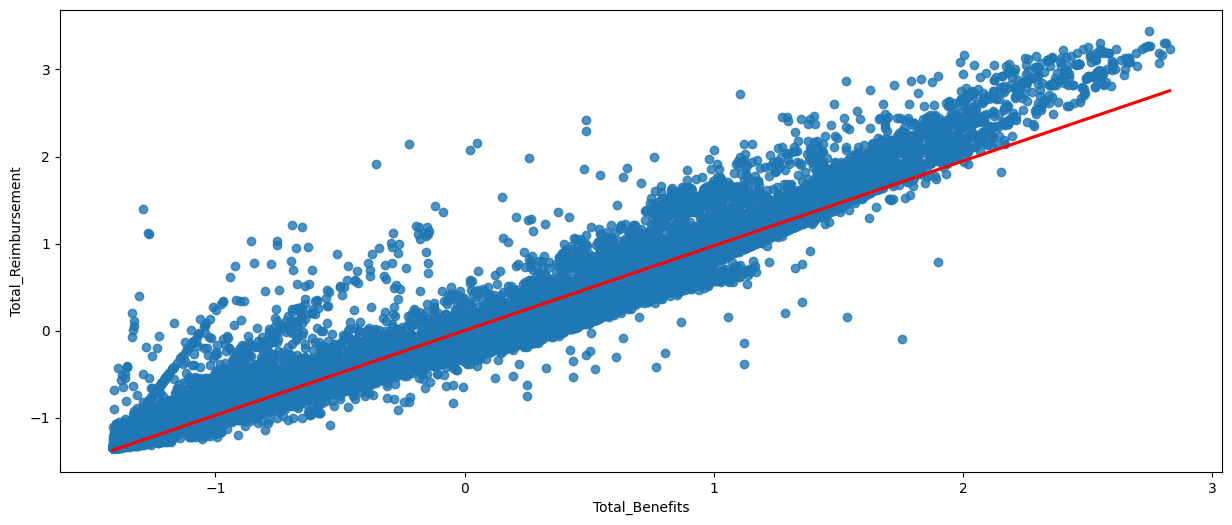

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(x=X_train_slr['Total_Benefits'],y=Y_train_slr['Total_Reimbursement'],line_kws={'color':'red'})
plt.show()

# MLP

## Assumption validation before Model Building


1.  Dependent variable should be numeric
2. There should be no multicollinearity



In [ ]:
df_feature=df.drop("Total_Reimbursement",axis=1)

In [ ]:
df_feature.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits
0,2015,Financial,0.979272,-0.476483,-0.234449,0.921924,0.911621,1.173963,1.141794,1.156388
1,2015,Calendar,-1.259481,-0.588280,-0.175594,-1.270526,-1.504303,-1.186975,-1.269380,-1.374560
3,2018,Financial,-0.170114,0.091140,-0.431752,-0.175099,-1.592864,-0.037175,-0.043455,-0.529238
4,2017,Financial,-0.264471,-0.588280,-0.429539,-0.306397,-0.409093,-0.318044,-0.263806,-0.355332
5,2017,Calendar,0.531722,0.015083,-0.431014,0.506445,0.989313,0.506980,0.698624,0.726492


In [ ]:
df_target=df["Total_Reimbursement"]
df_target.head()

,Total_Reimbursement
0,0.996728
1,-1.312351
3,-0.275882
4,-0.323152
5,0.573053


## 1. Checking data type of target variable

In [ ]:
df_target.dtype

dtype('float64')

## Check for no multiColliniarity or little multcoll

In [ ]:
df_feature.values

array([[2015, 'Financial', 0.9792716817507522, ..., 1.1739634275091233,
        1.1417942268272603, 1.1563883161663584],
       [2015, 'Calendar', -1.2594811505634196, ..., -1.1869749156686757,
        -1.2693804180486818, -1.3745602634155094],
       [2018, 'Financial', -0.17011406336416943, ...,
        -0.03717483522288162, -0.04345489872835704, -0.5292382411216233],
       ...,
       [2016, 'Financial', -0.39460229198326335, ...,
        -0.41101155304206877, -0.32287898232486223, -0.35852097290073326],
       [2016, 'Financial', -0.13719604158296567, ...,
        -0.17862675124185595, 0.20519700197404045, 0.10969289557310498],
       [2018, 'Financial', 0.4118446252663078, ..., 0.5374583188963526,
        0.5757650222026313, 0.6927130902675622]], dtype=object)

In [ ]:
df_numeric_feature=df_feature.select_dtypes(include=np.number)
df_numeric_feature.head()

,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits
0,0.979272,-0.476483,-0.234449,0.921924,0.911621,1.173963,1.141794,1.156388
1,-1.259481,-0.588280,-0.175594,-1.270526,-1.504303,-1.186975,-1.269380,-1.374560
3,-0.170114,0.091140,-0.431752,-0.175099,-1.592864,-0.037175,-0.043455,-0.529238
4,-0.264471,-0.588280,-0.429539,-0.306397,-0.409093,-0.318044,-0.263806,-0.355332
5,0.531722,0.015083,-0.431014,0.506445,0.989313,0.506980,0.698624,0.726492


In [ ]:


vif_threshold = 10.0
count = 0
while True:
    # Create an empty dataframe to store VIF values
    vif = pd.DataFrame()
    count+=1
    # Calculate VIF for each feature
    vif["VIF Factor"] = [variance_inflation_factor(df_numeric_feature.values, i) for i in range(df_numeric_feature.shape[1])]
    vif["Features"] = df_numeric_feature.columns

    multi = vif[vif['VIF Factor'] > vif_threshold]

    if multi.empty:
        print(vif)
        break

    df_sorted = multi.sort_values(by='VIF Factor', ascending=False)

    # Identify the feature with the highest VIF
    highest_vif_feature = df_sorted.iloc[0]["Features"]

    print(f"Removing feature: {highest_vif_feature} with VIF: {df_sorted.iloc[0]['VIF Factor']}")

    df_numeric_feature.drop(columns=[highest_vif_feature], inplace=True)



Removing feature: Income with VIF: inf
Removing feature: Health_Insurance with VIF: inf
Removing feature: Total_Benefits with VIF: 33.746230987528875
Removing feature: Total_Income with VIF: 14.549794219036977
   VIF Factor        Features
0    1.176818    Other_Income
1    1.107197        Overtime
2    3.914703      Retirement
3    3.699482  Other_Benefits


In [ ]:
df_numeric_feature_with_no_multicoll=df_numeric_feature.loc[:,vif['Features']]
df_numeric_feature_with_no_multicoll.head()

,Other_Income,Overtime,Retirement,Other_Benefits
0,-0.476483,-0.234449,1.173963,1.141794
1,-0.588280,-0.175594,-1.186975,-1.269380
3,0.091140,-0.431752,-0.037175,-0.043455
4,-0.588280,-0.429539,-0.318044,-0.263806
5,0.015083,-0.431014,0.506980,0.698624


## Deal with dummy Data

In [ ]:
df_cat = df.select_dtypes(include=[object])


In [ ]:
encoded_data = pd.get_dummies(data=df_cat, drop_first=True).astype(int)
encoded_data.head()

,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial
0,0,0,0,1
1,0,0,0,0
3,0,0,1,1
4,0,1,0,1
5,0,1,0,0


In [ ]:
df_with_dummy=pd.concat([encoded_data,df_numeric_feature],axis=1)
df_with_dummy.head()

,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial,Other_Income,Overtime,Retirement,Other_Benefits
0,0,0,0,1,-0.476483,-0.234449,1.173963,1.141794
1,0,0,0,0,-0.588280,-0.175594,-1.186975,-1.269380
3,0,0,1,1,0.091140,-0.431752,-0.037175,-0.043455
4,0,1,0,1,-0.588280,-0.429539,-0.318044,-0.263806
5,0,1,0,0,0.015083,-0.431014,0.506980,0.698624


## Now train the model



In [ ]:
X_full=df_with_dummy.copy()
y_full=df_target.copy()

X_train_full,X_test_full,Y_train_full,Y_test_full=train_test_split(X_full,y_full,random_state=1,test_size=0.3)


In [ ]:
X_train_full.shape

(26320, 8)

In [ ]:
intercept_x=np.ones(X_train_full.shape[0],dtype=float)

In [ ]:
X_train_full.insert(0,column='intercept',value=intercept_x)

In [ ]:
X_train_full.head()


,intercept,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial,Other_Income,Overtime,Retirement,Other_Benefits
32437,1.000000,0,0,1,0,-0.588280,-0.432490,-1.186861,-0.278006
27382,1.000000,0,0,0,0,2.401800,1.999757,1.349024,-0.641002
26627,1.000000,0,0,1,1,-0.588280,-0.428063,-1.138656,-1.257748
24073,1.000000,1,0,0,1,0.014766,-0.432490,0.555398,0.885386
49495,1.000000,0,1,0,1,-0.584518,-0.428063,0.878183,1.296182


In [ ]:
mlp_model=sm.OLS(Y_train_full,X_train_full).fit()

In [ ]:
mlp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Total_Reimbursement   R-squared:                       0.962
Model:                             OLS   Adj. R-squared:                  0.962
Method:                  Least Squares   F-statistic:                 8.218e+04
Date:                 Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                         19:04:49   Log-Likelihood:                 5495.0
No. Observations:                26320   AIC:                        -1.097e+04
Df Residuals:                    26311   BIC:                        -1.090e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.0454      0.003    -17.418      0.000      -0.050      -0.040
Year_2016                0.1115      0.004     27.297      0.000       0.104       0.120
Year_2017                0.0989      0.003     30.513      0.000       0.093       0.105
Year_2018                0.0019      0.003      0.603      0.547      -0.004       0.008
Type_of_yr_Financial     0.0019      0.003      0.714      0.475      -0.003       0.007
Other_Income             0.0563      0.001     42.864      0.000       0.054       0.059
Overtime                 0.0161      0.001     12.692      0.000       0.014       0.019
Retirement               0.7582      0.002    309.327      0.000       0.753       0.763
Other_Benefits           0.2300      0.002     96.794      0.000       0.225       0.235
==============================================================================
Omnibus:                    12755.584   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           939423.249
Skew:                           1.478   Prob(JB):                         0.00
Kurtosis:                      32.118   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear dependency between dependent variable and resid

---



In [ ]:
p_values=mlp_model.pvalues


alpha=0.05

significant_variable=p_values[p_values<alpha].index.tolist()
print(f"significant_variable: {(significant_variable)}")

significant_variable: ['intercept', 'Year_2016', 'Year_2017', 'Other_Income', 'Overtime', 'Retirement', 'Other_Benefits']


In [ ]:
residuals=mlp_model.resid
print(f"Residuals:{type(residuals)}" )

Residuals:<class 'pandas.core.series.Series'>


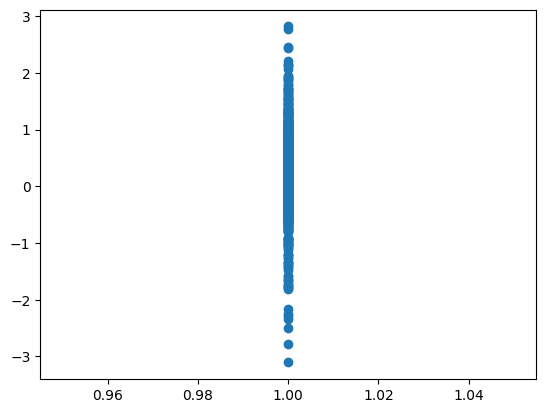

In [ ]:
plt.scatter(X_train_full['intercept'],residuals)
plt.show()

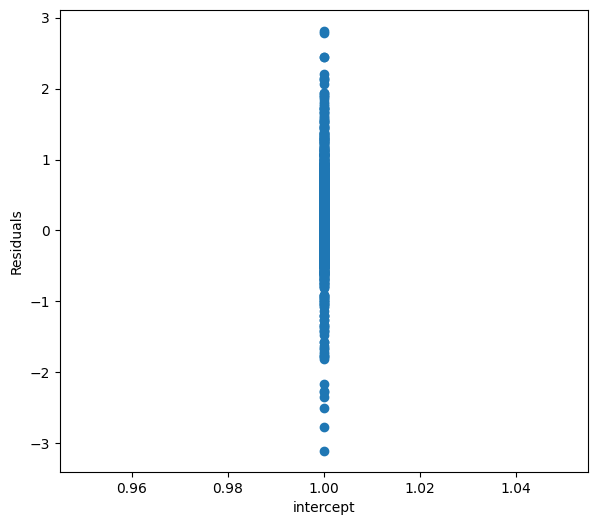

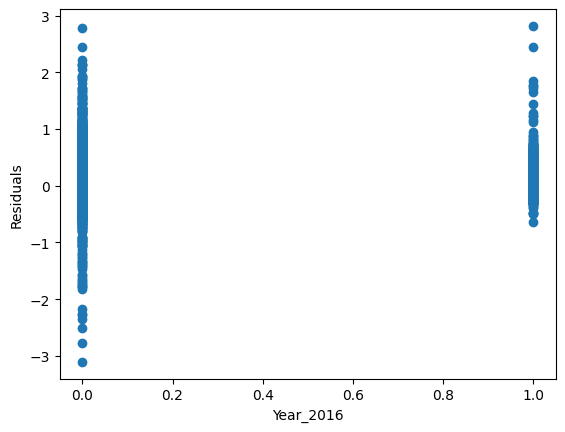

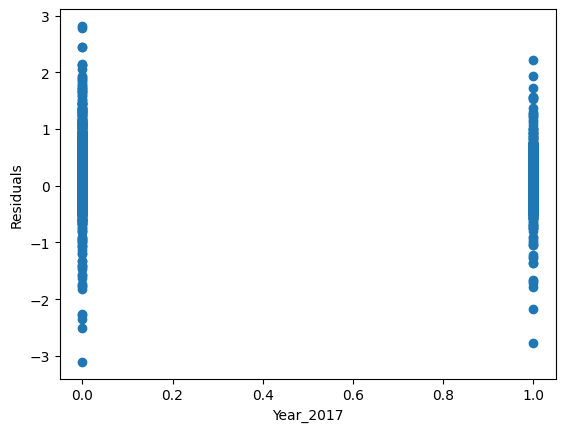

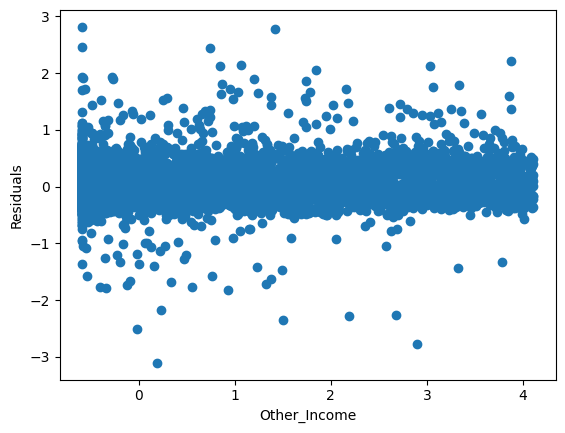

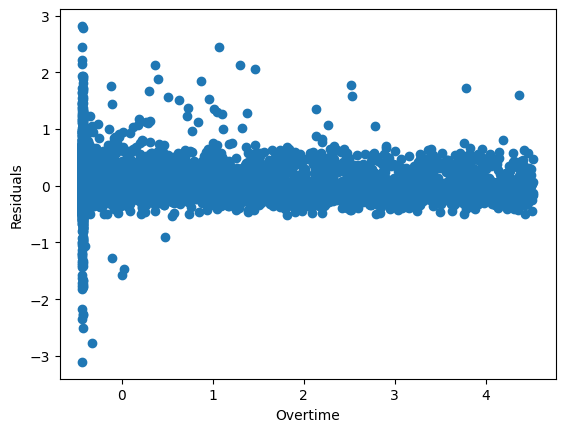

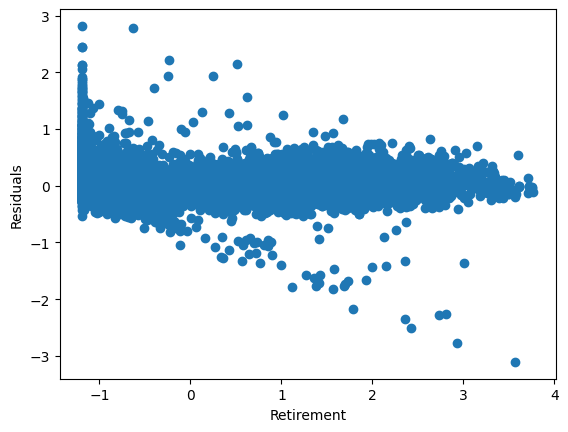

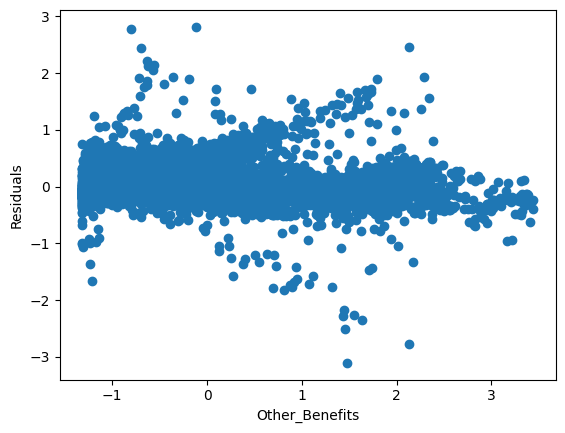

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
for sig in significant_variable:
  plt.scatter(X_train_full[sig],residuals)
  plt.xlabel(sig)
  plt.ylabel("Residuals")
  plt.show()
  # print(f"{sig}:{residuals}")
  # plt.xlabel(sig)
  # plt.ylabel("Residuals")
  # plt.show()


*   Since there is no pattern between independent and residuals so we can say there is linear dependency between residual and predictors




# Auto correlation

In [ ]:
print(f"Autocorrelation:{mlp_model.summary()}")
#

Autocorrelation:                             OLS Regression Results                            
Dep. Variable:     Total_Reimbursement   R-squared:                       0.962
Model:                             OLS   Adj. R-squared:                  0.962
Method:                  Least Squares   F-statistic:                 8.218e+04
Date:                 Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                         19:04:52   Log-Likelihood:                 5495.0
No. Observations:                26320   AIC:                        -1.097e+04
Df Residuals:                    26311   BIC:                        -1.090e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
interc

since durbin watson test give value in range of [1.5,2.5] there is no auto correlation

# Check for homoscedacity


In [ ]:
y_hat=mlp_model.predict(X_train_full)
print(f"{type(y_hat)}")


<class 'pandas.core.series.Series'>


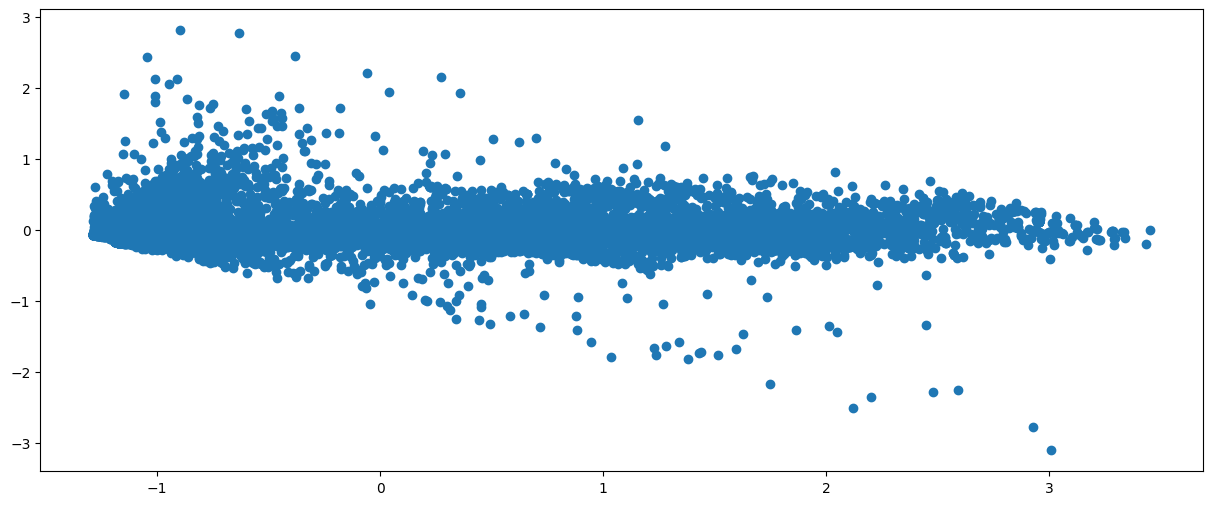

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(y_hat,residuals)
plt.show()

Since there is no pattern between y_hat and residuals ,so model is homoscedastic

H0:There is homoscedasticity

H1: There is hetroscedasticity

In [ ]:
test_stat = diag.het_breuschpagan(mlp_model.resid, mlp_model.model.exog)

print(test_stat[1])


1.0030077343807908e-132


since p_val is is less 0.05 we reject H0 model is hetroscedastic

# Test for normality

**QQ Plot**

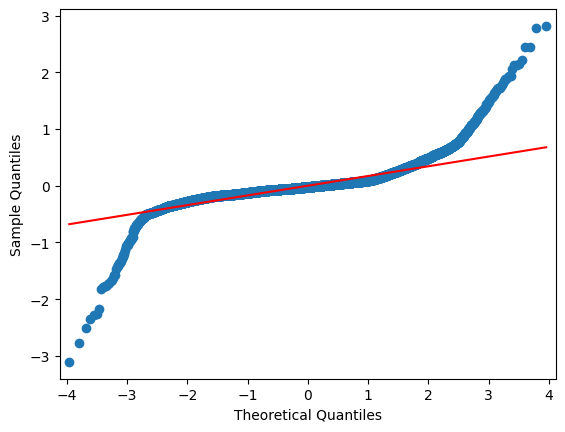

In [ ]:
sm.qqplot(residuals,line='r')
plt.show()

In [ ]:
stat,p_val=shapiro(residuals)
print(f"stat:{stat} p_val:{p_val}")

stat:0.7612452845614741 p_val:6.148186926101062e-104


since p-value of shapiro wilk test is than 0.05 ,we can say its not normally distributed

# Model Performance

In [ ]:
train_pred=mlp_model.predict(X_train_full)
train_pred.head()


,0
32437,-1.047346
27382,0.997528
26627,-1.234154
24073,0.686593
49495,0.979502


In [ ]:
X_train_full.head()

,intercept,Year_2016,Year_2017,Year_2018,Type_of_yr_Financial,Other_Income,Overtime,Retirement,Other_Benefits
32437,1.000000,0,0,1,0,-0.588280,-0.432490,-1.186861,-0.278006
27382,1.000000,0,0,0,0,2.401800,1.999757,1.349024,-0.641002
26627,1.000000,0,0,1,1,-0.588280,-0.428063,-1.138656,-1.257748
24073,1.000000,1,0,0,1,0.014766,-0.432490,0.555398,0.885386
49495,1.000000,0,1,0,1,-0.584518,-0.428063,0.878183,1.296182


In [ ]:
X_test_full.insert(0,column="intercept",value=np.ones(X_test_full.shape[0]))

In [ ]:
test_pred=mlp_model.predict(X_test_full)
print(f"test_pred:{(test_pred[0:5])}")

test_pred:41695    0.333075
76      -1.086191
38316   -1.166449
25510   -0.960719
6356    -1.001085
dtype: float64


In [ ]:
#calculating mse

# Calculating MSE

In [ ]:
mse_train=mean_squared_error(Y_train_full,train_pred)
mse_test=mean_squared_error(Y_test_full,test_pred)
print(f"mse_train:{mse_train} mse_test:{mse_test}")

mse_train:0.03856415092866266 mse_test:0.036855528853680604
